Outline- Perceptron & SVM:
    Load the wine data
    Split data into training and testing data
    Implement Perceptron Algorithm on the data
    Understand the impact of 'Cost' on the SVM margins
    Move to the Practice Problem

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
data = data[data['class'] !=3]
labels = data['class']
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

# Perceptron

In [3]:
# Model
clf = Perceptron(penalty='l1', alpha=0.01)
# fit
clf.fit(X_train, y_train)
# predict
pred = clf.predict(X_test)
#evaluate
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.538461538462


In [4]:
#coefficients
clf.coef_[0]

array([  597.66,    77.12,   105.85,  1297.5 ,  4616.8 ,    88.64,
          57.02,    18.83,    72.81,    11.69,    59.65,   125.41, -1453.8 ])

# SVM

In [5]:
# Only 2 classes, 2 features
data = pd.read_csv('wine_original.csv')
data = data[data['class'] != 3]
labels = data['class']
data['class'] -=1 
del data['class']

# Create training and test sets
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

In [6]:
#Model
clf = SVC(kernel='linear')
#fit
clf.fit(X_train, y_train)
#predict
pred = clf.predict(X_test)
#Evaluate
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.769230769231


In [7]:
from matplotlib.colors import ListedColormap

def plt_boundary(C):

    h = .008  # step size in the mesh


    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, pred)

    s_vectors = clf.support_vectors_
    
    idx = clf.support_
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
    y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c=y_train.values[idx], s=100,
                facecolors='none', zorder=10, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Alcohol', fontsize=20)
    plt.ylabel('Hue', fontsize=20)
    plt.title("SVM for C = %s (Train Acc= %.3f)"
                  % (str(C), accuracy), fontsize=20)


    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    svm_sep = a * xx[0] - (clf.intercept_[0]) / w[1]
    

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    svm_sep_down = svm_sep + a * margin
    svm_sep_up = svm_sep - a * margin

    plt.plot(xx[0], svm_sep, 'k-')
    plt.plot(xx[0], svm_sep_down, 'k--')
    plt.plot(xx[0], svm_sep_up, 'k--')

    plt.savefig('svm')
    plt.show()

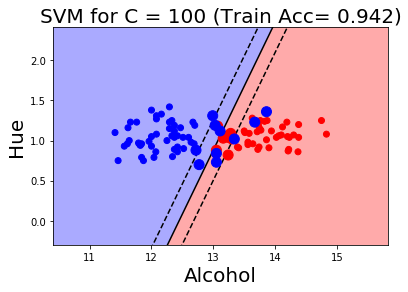

In [8]:
plt_boundary(100)

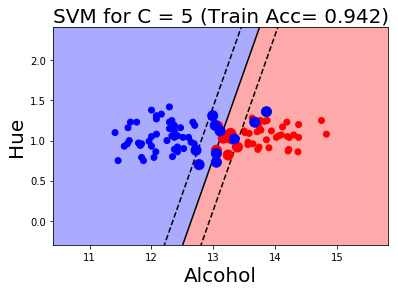

In [9]:
plt_boundary(5)

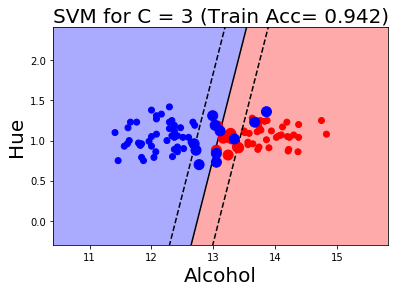

In [10]:
plt_boundary(3)

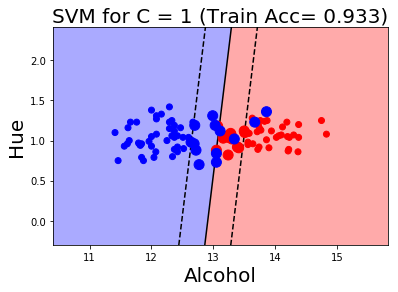

In [11]:
plt_boundary(1)

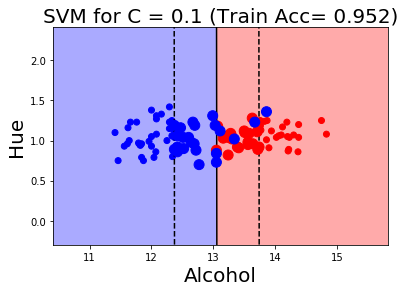

In [12]:
plt_boundary(0.1)

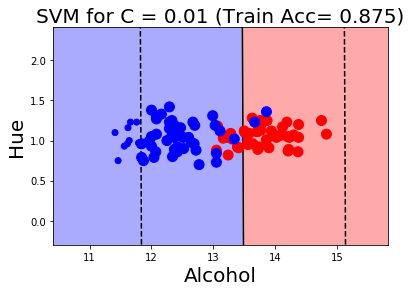

In [13]:
plt_boundary(0.01)

In [ ]:
# Why the boundary shifted to right?

# Practice Question
1. Implement Perceptron Model on Iris dataset (first 2 features)
2. Divide the dataset into Train, Validation and Test data. Tune the cost parameter for SVM on Iris data.
Try Values {0.0001, 0.001,0.01,0.1,1,10,100}
3. Select the best and the worst value and compare the results on the test data.

In [15]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [16]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [17]:
clf = Perceptron(penalty='l1', alpha=0.01)
# fit
clf.fit(X_train, y_train)
# predict
pred = clf.predict(X_test)
#evaluate
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.769230769231
